In [3]:
#
# TASK 2: Principal Component Analysis (PCA)  [30 Minutes]
# 
# Dataset: "nndb_flat.csv"
# 
# Task to carry out:  Use the USDA nutritional dataset "nndb_flat.csv" from Canvas. This data is a 
# flattened version of the USDA National Nutrient Database. Each record contains nutrition 
# information about 100 grams of a given product. There are dozens of columns (features) to 
# explore. But perhaps they are not all useful, and we can reduce the dataset to something 
# with fewer dimensions. Apply PCA to this dataset. 
#

In [41]:
############################################################################
#                                                                          #
#                          Load and process data                           #
#                                                                          #
############################################################################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("nndb_flat.csv", index_col=0)

# Drop columns that are entirely NaN, that way we can drop NaN values without dropping the entire data frame.
df.drop(columns=["CommonName", "MfgName", "ScientificName"], inplace=True)
df.dropna()

# Drop outcome variable and string variables from feature set
X = df.drop(columns=["FoodGroup", "ShortDescrip", "Descrip"])

# Select target variable 
y = df.FoodGroup
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Inspect shape of X to see it currently has 38 features
print(f"\nShape of X: {X.shape} \n")

print (y)


Shape of X: (8618, 38) 

[ 7  7  7 ... 23 10 10]


[[-1.81146809  0.24436929]
 [-1.80689191  0.25190405]
 [-1.7881686   0.23005303]
 ...
 [-1.69631052 -1.3276561 ]
 [ 0.69967735  0.08078491]
 [-0.95280859  0.73265431]]

Explained variance ratio (first two components): [0.25970166 0.10828204]




C:\Users\laesc\AppData\Local\Temp\ipykernel_22704\3633760550.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


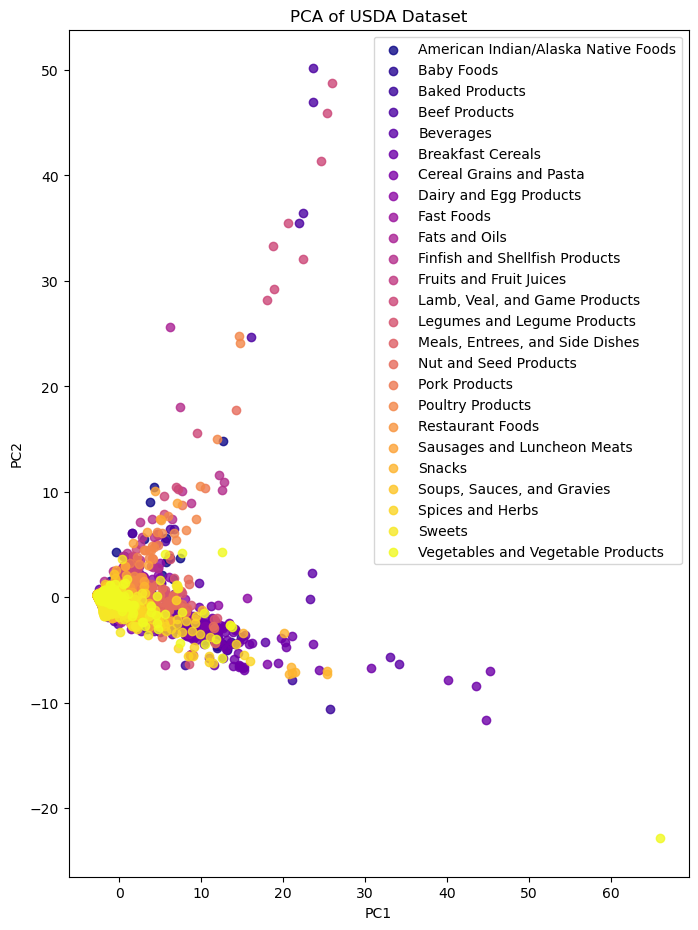

In [47]:
############################################################################
#                                                                          #
#                       Principle Component Analysis                       #
#                                                                          #
############################################################################

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Standardize the features to have a mean of 0 and standard deviation of 1
X_s = StandardScaler().fit_transform(X)

# Initialize PCA, setting the number of components to 2 for a 2D projection
pca = PCA(n_components=2)

# Apply PCA to the scaled data and project it onto the 2 principal components
X_r2 = pca.fit_transform(X_s)

print (X_r2)

# Print the explained variance ratio of the first two principal components
print('\nExplained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))
print ('\n')

# Configure plot
colors = ['darkmagenta', 'slateblue', 'pink', 'red']
plt.figure(figsize=(8, 11))
class_labels = np.arange(len(encoder.classes_))
cmap = plt.cm.get_cmap('plasma')  
color_norm = plt.Normalize(vmin=0, vmax=len(encoder.classes_) - 1)
colors = cmap(color_norm(range(len(encoder.classes_))))

# Loop through each class and its corresponding color and label for plotting
for color, i, target_name in zip(colors, class_labels, encoder.classes_):
    # Scatter plot of the reduced data points, colored by class
    # 'y == i' selects data points belonging to encoded class i against the PC
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of USDA Dataset')
plt.show()

# Get the eigenvalues (explained variance for each component)
eigenvalues = pca.explained_variance_  # pca is assumed to be your PCA object

#
# Principle Component Analysis Analysis:
#
# PCA is a dimensionality reduction technique which locates the direction in which the data
# points are the most spread out. This is the first principle component (PC1). By identifying this
# direction, PCA captures the most significant variation in the data. PCA then continues isolating
# further principle components (PC2, PC3, etc.) that explain the remaining variance, but only
# for directions that are uncorrelated with previous principle components. Then, PCA projects the 
# data points onto these new, lower dimensional axes (principle components). This represents
# a compressed version of the dataset with fewer features. 
# 
# It is important to note that since PCA prioritizes features with larger variances, it is highly
# recommended to standardize or normalize X before performing PCA on it. Also note that PCA assumes 
# a linear relationship between features. This is an unsupervised technique and does not require class
# labels. PCA can be used on textual or numerical data.
# 
# PCA determines which directions have the highest varince by calculating the covariance matrix, then
# performing eigenvalue decomposition on said matrix. This identifies the eigenvectors (directions
# of greates variance) and eigenvalues (amount of variance explained by each direction) within the data.
# The eigenvectors with the highest corresponding eigenvalues are extracted, and these are the principle
# components.
#
# Analysis:
#
# I do not think the PCA worked well, or I did something wrong, as we do not see distinct groups at all here.
# I also plotted the scree plot of the eigenvalues.
#